# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 4
# Regularization, High Dimensionality, PCA


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately): Ryan Mitchell

Enrollment Status (109A, 121A, 209A, or E109A): 109A

Import libraries:

In [393]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
%matplotlib inline

# Continuing Bike Sharing Usage Data

In this homework, we will focus on multiple linear regression, regularization, dealing with high dimensionality, and PCA. We will continue to build regression models for the Capital Bikeshare program in Washington D.C.  See Homework 3 for more information about the data.

*Note: please make sure you use all the processed data from HW 3 Part (a)...you make want to save the data set on your computer and reread the csv/json file here.


In [394]:
train_df = pd.read_csv('./data/train_processed.csv')
test_df = pd.read_csv('./data/test_processed.csv')
train_df = train_df.drop('Unnamed: 0', 1)
test_df = test_df.drop('Unnamed: 0', 1)
train_df.head()
test_df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1.0,season_2.0,season_3.0,...,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,weather_1.0,weather_2.0,weather_3.0,temp_norm,atemp_norm,humidity_norm,windspeed_norm
0,0.0,1.0,2.0,6.0,56.2083,0.194037,3830.0,1,0,0,...,1,0,0,1,0,0,-1.341801,-1.363792,-0.500703,0.040945
1,0.0,1.0,1.0,3.0,65.2917,0.350133,2114.0,1,0,0,...,1,0,0,0,1,0,-1.431146,-1.665877,0.132958,2.036025
2,0.0,1.0,36.0,37.0,56.8333,0.149883,915.0,0,1,0,...,1,0,0,0,1,0,1.695943,1.757749,-0.457103,-0.523392
3,0.0,1.0,8.0,12.0,49.0833,0.268033,4322.0,1,0,0,...,0,0,0,1,0,0,-0.805728,-0.759623,-0.997746,0.986696
4,0.0,0.0,28.0,29.0,69.7083,0.215171,6591.0,0,1,0,...,0,0,0,1,0,0,0.981180,0.952190,0.441062,0.311061


## Part (f): Regularization/Penalization Methods

As an alternative to selecting a subset of predictors and fitting a regression model on the subset, one can fit a linear regression model on all predictors, but shrink or regularize the coefficient estimates to make sure that the model does not "overfit" the training set. 

Use the following regularization techniques to fit linear models to the training set:
- Ridge regression
- Lasso regression
    
You may choose the shrikage parameter $\lambda$ from the set $\{10^{-5}, 10^{-4},...,10^{4},10^{5}\}$ using cross-validation. In each case, 

- How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b) fropm HW 3? Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.
- List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3?
- Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors `temp` and `atemp`? If so, explain the reason for the difference.


/Users/sshaffer/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


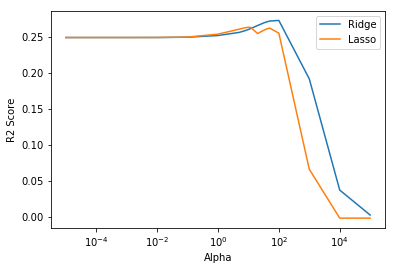

Best Lasso: 10
Best Ridge: 100


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [395]:
# Use Ridge and Lasso regression to create models on the training set

# Remove the numeric columns that have been normalized separately, as well as the redundant categorical columns
remove_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count', 'season_3.0', 'month_12.0', 'day_of_week_6.0', 'weather_3.0']

Xtrain = train_df[train_df.columns.difference(remove_cols)]
Xtest  = test_df[test_df.columns.difference(remove_cols)]
predictors = list(Xtrain)

# Create response 
ytrain = train_df['count']
ytest  = test_df['count']

# Added additional alpha values around 10 in order to get more precise data around this location
alphas = [.00001, .0001, .001, .01, .1, 1, 5, 8, 10, 12, 20, 30, 35, 40, 45, 50, 100, 1000, 10000, 100000]
r2s = {'ridge':[], 'lasso':[]}

for alpha in alphas:
    # Fit Lasso regression and add r2 results to r2 object
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(Xtrain, ytrain)
    lasso_preds = lasso.predict(Xtest)
    r2s['lasso'].append(r2_score(ytest, lasso_preds))
    
    # Fit Ridge regression add r2 results to r2 object
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(Xtrain, ytrain)
    ridge_preds = ridge.predict(Xtest)
    r2s['ridge'].append(r2_score(ytest, ridge_preds))
    
# Use a semilogx plot to display alpha values on a normalized scale
plt.semilogx(alphas, r2s['ridge'], label='Ridge')
plt.semilogx(alphas, r2s['lasso'], label='Lasso')
plt.ylabel("R2 Score")
plt.xlabel("Alpha")
plt.legend()
plt.show()

# Get the best r2 score found for both ridge and lasso
winningRidge = np.argmax(r2s['ridge'])
winningLasso = np.argmax(r2s['lasso'])
print("Best Lasso: "+str(alphas[winningLasso]))
print("Best Ridge: "+str(alphas[winningRidge]))

# Plot all r2 scores by their alpha value
lasso = Lasso(alpha=alphas[winningLasso], fit_intercept=True)
lasso.fit(Xtrain, ytrain)

ridge = Ridge(alpha=alphas[winningRidge], fit_intercept=True)
ridge.fit(Xtrain, ytrain)

    

In [396]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(Xtrain, ytrain)

predictors = np.array(predictors)
coefficients = np.transpose([predictors, ridge.coef_, lasso.coef_, linreg.coef_])
coefficients_df = pd.DataFrame(coefficients, columns=['predictors', 'Ridge', 'Lasso', 'Normal'])
coefficients_df.head(len(coefficients_df))


,predictors,Ridge,Lasso,Normal
0,atemp_norm,471.65686796460324,452.32036774443935,312.43407188889796
1,day_of_week_0.0,-84.42496035271255,-306.2418651503781,-465.1450099570902
2,day_of_week_1.0,-89.06248939039168,-201.48785387674346,-256.6500506662598
3,day_of_week_2.0,-31.189729499901865,-144.6498385720568,-328.1845068957066
4,day_of_week_3.0,39.961127678447966,0.0,37.61277259517965
5,day_of_week_4.0,25.985191169271868,-0.0,-71.64254439857939
6,day_of_week_5.0,57.02446103414826,9.51114916914812,-21.831674879257434
7,holiday,-43.34246184082053,-179.77933843895644,-616.6027102985504
8,humidity_norm,-354.4763637051971,-567.6253916153483,-548.4929490582165
9,month_1.0,-157.83011306540536,-65.66318839582553,118.83581871663228


We next analyze the performance of the two shrinkage methods for different training sample sizes:
- Generate random samples of sizes 100, 150, ..., 400 from the training set. You may use the following code to draw a random sample of a specified size from the training set:

/Users/sshaffer/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


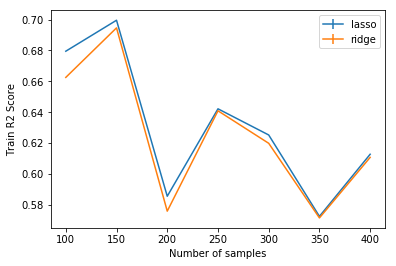

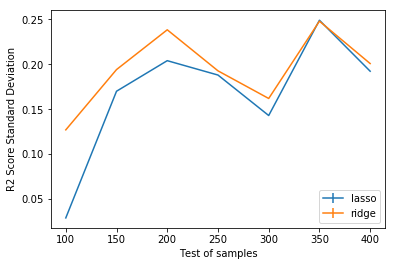

In [397]:
#--------  sample
# A function to select a random sample of size k from the training set
# Input: 
#      x (n x d array of predictors in training data)
#      y (n x 1 array of response variable vals in training data)
#      k (size of sample) 
# Return: 
#      chosen sample of predictors and responses

def get_samples(x, y, k):
    n = x.shape[0] # No. of training points
    
    # Choose random indices of size 'k'
    subset_ind = np.random.choice(np.arange(n), k)
    
    # Get predictors and reponses with the indices
    x_subset = x[subset_ind, :]
    y_subset = y[subset_ind]
    return (x_subset, y_subset)

sample_sizes = [100, 150, 200, 250, 300, 350, 400]
r2s = {'ridge':{}, 'lasso':{}}

for sample_size in sample_sizes:
    X_sample, y_sample = get_samples(Xtrain.values, ytrain.values, sample_size)

    r2s['ridge'][sample_size] = {'test': {'samples': [], 'std':None, 'mean':None}, 'train': {'samples': [], 'std':None, 'mean':None}}
    r2s['lasso'][sample_size] = {'test': {'samples': [], 'std':None, 'mean':None}, 'train': {'samples': [], 'std':None, 'mean':None}}
    
    for i in range(10):
        ridge = Ridge()
        ridge.fit(X_sample, y_sample)
        ridge_train_predictions = ridge.predict(X_sample)
        r2s['ridge'][sample_size]['train']['samples'].append(r2_score(y_sample, ridge_train_predictions))
        
        ridge_test_predictions = ridge.predict(Xtest)
        r2s['ridge'][sample_size]['test']['samples'].append(r2_score(ytest, ridge_test_predictions))
        
        lasso = Lasso()
        lasso.fit(X_sample, y_sample)
        lasso_train_predictions = lasso.predict(X_sample)
        r2s['lasso'][sample_size]['train']['samples'].append(r2_score(y_sample, lasso_train_predictions))
        
        lasso_test_predictions = lasso.predict(Xtest)
        r2s['lasso'][sample_size]['test']['samples'].append(r2_score(ytest, lasso_test_predictions))
        
        
    r2s['ridge'][sample_size]['train']['mean'] = np.mean(r2s['ridge'][sample_size]['train']['samples'])
    r2s['ridge'][sample_size]['train']['std'] = np.std(r2s['ridge'][sample_size]['train']['samples'])
    
    r2s['lasso'][sample_size]['train']['mean'] = np.mean(r2s['lasso'][sample_size]['train']['samples'])
    r2s['lasso'][sample_size]['train']['std'] = np.std(r2s['lasso'][sample_size]['train']['samples'])
    
    r2s['ridge'][sample_size]['test']['mean'] = np.mean(r2s['ridge'][sample_size]['test']['samples'])
    r2s['ridge'][sample_size]['test']['std'] = np.std(r2s['ridge'][sample_size]['test']['samples'])
    
    r2s['lasso'][sample_size]['test']['mean'] = np.mean(r2s['lasso'][sample_size]['test']['samples'])
    r2s['lasso'][sample_size]['test']['std'] = np.std(r2s['lasso'][sample_size]['test']['samples'])

# Plot means and standard deviations of R2 scores for sample sizes across ridge and lasso
plt.figure()
plt.xlabel("Number of samples")
plt.ylabel("Train R2 Score")
plt.errorbar(sample_sizes, [r2s['lasso'][s]['train']['mean'] for s in sample_sizes], yerr=[r2s['lasso'][s]['train']['std'] for s in sample_sizes], label='lasso')
plt.errorbar(sample_sizes, [r2s['ridge'][s]['train']['mean'] for s in sample_sizes], yerr=[r2s['ridge'][s]['train']['std'] for s in sample_sizes], label='ridge')
plt.legend(loc='upper right')
plt.show()

plt.xlabel("Test of samples")
plt.ylabel("R2 Score Standard Deviation")

plt.errorbar(sample_sizes, [r2s['lasso'][s]['test']['mean'] for s in sample_sizes], yerr=[r2s['lasso'][s]['test']['std'] for s in sample_sizes], label='lasso')
plt.errorbar(sample_sizes, [r2s['ridge'][s]['test']['mean'] for s in sample_sizes], yerr=[r2s['ridge'][s]['test']['std'] for s in sample_sizes], label='ridge')
plt.legend(loc='lower right')
plt.show()


- Fit linear, Ridge and Lasso regression models to each of the generated sample. In each case, compute the $R^2$ score for the model on the training sample on which it was fitted, and on the test set.
- Repeat the above experiment for 10 random trials/splits, and compute the average train and test $R^2$ across the trials for each training sample size. Also, compute the standard deviation (SD) in each case.
- Make a plot of the mean training $R^2$ scores for the linear, Ridge and Lasso regression methods as a function of the training sample size. Also, show a confidence interval for the mean scores extending from **mean - SD** to **mean + SD**. Make a similar plot for the test $R^2$ scores.

How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations. How do the confidence intervals for the estimated $R^2$ change with training sample size? Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?

*Hint:* You may use `sklearn`'s `RidgeCV` and `LassoCV` classes to implement Ridge and Lasso regression. These classes automatically perform cross-validation to tune the parameter $\lambda$ from a given range of values. You may use the `plt.errorbar` function to plot confidence bars for the average $R^2$ scores.

#### Q: How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrinkage penalty) in Part (b) from HW 3? 
A:  Doing a quick visual comparison, refer to the "coefficients_df.head" output above, we observe the estimated coefficients for both Ridge and Lasso regression appear to be lower, on average, than plain linear regression with some (6) of the Lasso coefficients are zeroed out.  We verify this observation more rigorously by computing the mean and standard deviation of the absolute values of the estimated coefficients (see above).  Both the mean and standard deviation is lowest for Ridge, followed by Lasso, following by plain linear regression.  This is expected since coefficient shrinkage is the main goal of Ridge and Lasso regression, and in the case of Lasso, variable reduction, i.e., some coefficients are set to 0.

#### Q: Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference. 

A: Yes, both methods perform coefficient shrinkage, however, Lasso also zeroes out coefficients thereby producing a sparser solution.  The reason for this difference is that Lasso speciifies a constraint defined on the sum of the absolute values of the estimated coefficients (L1 Norm) vs the sum of the squares of the estimated coefficients (L2 Norm). The nature of using the L1 Norm constraint has the effect of zeroing out coefficients while the L2 Norm constraint merely has the effect of reducing the estimated coefficients. 

#### Q: List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3? 

A:  For Ridge regression, no predictors were set very close to zero (< 1e-10).  For Lasso regression, six (6) coefficients are assigned to 0: day_of_week_3.0, day_of_week_4.0, month_2.0, month_5.0, month_11.0, and workingday.   In Part (c) of HW3, working days, holidays, and days of week were identified as having strong correlations.  Lasso zeroed out working days.   

#### Q: Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors temp and atemp? If so, explain the reason for the difference. 

A: The predictors temp and atemp are highly correlated (0.98) predictors.  Ridge assigns both of these predictors approximately the same value (472 and 469).  Lasso assigns them different values (452 and 680), we would have expected Lasso to assign one of these predictors to zero.

## Part (g): Polynomial & Interaction Terms

Moving beyond linear models, we will now try to improve the performance of the regression model in Part (b) from HW 3 by including higher-order polynomial and interaction terms. 

- For each continuous predictor $X_j$, include additional polynomial terms $X^2_j$, $X^3_j$, and $X^4_j$, and fit a multiple regression model to the expanded training set. How does the $R^2$ of this model on the test set compare with that of the linear model fitted in Part (b) from HW 3? Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%. 

- Fit a multiple linear regression model with additional interaction terms $\mathbb{I}_{month = 12} \times temp$ and $\mathbb{I}_{workingday = 1} \times \mathbb{I}_{weathersit = 1}$ and report the test $R^2$ for the fitted model. How does this compare with the $R^2$ obtained using linear model in Part (b) from HW 3? Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%?

In [398]:
from sklearn.linear_model import LinearRegression

def get_summary_df(X, y):
    ols = sm.OLS(y, X).fit()
    
    summary_data = ols.summary().tables[1].data
    header = summary_data.pop(0)
    header[0] = 'predictor'

    # We get the data as strings -- convert here. 
    for i in range(len(summary_data)):
        summary_data[i][1] = float(summary_data[i][1])
        summary_data[i][2] = float(summary_data[i][2])
        summary_data[i][3] = float(summary_data[i][3])
        summary_data[i][4] = float(summary_data[i][4])
        summary_data[i][5] = float(summary_data[i][5])
        summary_data[i][6] = float(summary_data[i][6])
        
    summary_df = pd.DataFrame(summary_data, columns=header)
    return summary_df

# Predictors
numeric_cols = ['temp_norm', 'atemp_norm', 'humidity_norm', 'windspeed_norm']
Xtrain_poly = Xtrain.copy()
Xtest_poly = Xtest.copy()

for numeric_col in numeric_cols:
    Xtrain_poly[numeric_col+'_2'] = Xtrain[numeric_col]**2
    Xtrain_poly[numeric_col+'_3'] = Xtrain[numeric_col]**3
    Xtrain_poly[numeric_col+'_4'] = Xtrain[numeric_col]**4
    
    Xtest_poly[numeric_col+'_2'] = Xtest[numeric_col]**2
    Xtest_poly[numeric_col+'_3'] = Xtest[numeric_col]**3
    Xtest_poly[numeric_col+'_4'] = Xtest[numeric_col]**4
Xtrain_poly.head()


linreg_poly = LinearRegression().fit(Xtrain_poly, ytrain)
trainPreds_poly = linreg_poly.predict(Xtrain_poly)
print("Train R2:")
print(r2_score(ytrain, trainPreds_poly))

testPreds_poly = linreg_poly.predict(Xtest_poly)
print("Test R2:")
print(r2_score(ytest, testPreds_poly))

Xtest_intercept = sm.add_constant(Xtest_poly)
summary_df = get_summary_df(Xtest_intercept, ytest)
summary_df.sort_values('P>|t|', inplace=True)
summary_df.head(30)


Train R2:
0.669656240221
Test R2:
0.277238435086


,predictor,coef,std err,t,P>|t|,[0.025,0.975]
0,const,3651.0945,1061.216,3.440,0.001,1564.133,5738.056
29,temp_norm_2,-2759.4370,1002.647,-2.752,0.006,-4731.218,-787.656
25,weather_1.0,1984.3455,736.827,2.693,0.007,535.319,3433.372
34,atemp_norm_4,-376.7993,147.915,-2.547,0.011,-667.686,-85.913
26,weather_2.0,1774.8474,694.078,2.557,0.011,409.890,3139.805
32,atemp_norm_2,2198.9751,903.790,2.433,0.015,421.604,3976.346
7,day_of_week_5.0,521.6191,230.018,2.268,0.024,69.271,973.967
6,day_of_week_4.0,475.1143,223.309,2.128,0.034,35.960,914.269
9,humidity_norm,-454.5818,215.594,-2.109,0.036,-878.564,-30.600
15,month_4.0,-1376.1298,715.532,-1.923,0.055,-2783.277,31.017


In [399]:
Xtrain_interaction = Xtrain.copy()
Xtest_interaction = Xtest.copy()

months = ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0']
weathers = ['1.0', '2.0']

for month in months:
    Xtrain_interaction['temp_month_'+month] = Xtrain['month_'+month]* Xtrain['temp_norm']
    Xtest_interaction['temp_month_'+month] = Xtest['month_'+month]* Xtest['temp_norm']

for weather in weathers:
    Xtrain_interaction['working_weather_'+month] = Xtrain['weather_'+weather] * Xtrain['workingday']
    Xtest_interaction['working_weather_'+month] = Xtest['weather_'+weather] * Xtest['workingday']
    
Xtrain_interaction.head()

linreg = LinearRegression().fit(Xtrain_interaction, ytrain)
trainPreds = linreg.predict(Xtrain_interaction)
print("Train R2:")
print(r2_score(ytrain, trainPreds))

testPreds = linreg.predict(Xtest_interaction)
print("Test R2:")
print(r2_score(ytest, testPreds))

Xtest_intercept = sm.add_constant(Xtest_interaction)
summary_df = get_summary_df(Xtest_intercept, ytest)
summary_df.sort_values('P>|t|', inplace=True)
summary_df.head(30)

Train R2:
0.668934037226
Test R2:
0.264607295698


,predictor,coef,std err,t,P>|t|,[0.025,0.975]
0,const,5323.2503,1189.500,4.475,0.000,2984.009,7662.491
35,temp_month_7.0,-5212.4875,1361.987,-3.827,0.000,-7890.938,-2534.037
34,temp_month_6.0,-6283.1998,1163.960,-5.398,0.000,-8572.215,-3994.185
26,weather_2.0,2840.8660,638.731,4.448,0.000,1584.752,4096.980
25,weather_1.0,2705.0879,593.435,4.558,0.000,1538.054,3872.122
24,temp_norm,5816.2396,1405.182,4.139,0.000,3052.843,8579.636
39,temp_month_11.0,-4170.4130,1183.890,-3.523,0.000,-6498.623,-1842.203
12,month_11.0,-4274.6630,1159.220,-3.688,0.000,-6554.356,-1994.970
15,month_4.0,-3592.7561,1113.269,-3.227,0.001,-5782.084,-1403.428
11,month_10.0,-2669.7716,915.400,-2.917,0.004,-4469.974,-869.569


#### Q: Polynomial model: How does the  R2  of this model on the test set compare with that of the linear model fitted in Part (b) from HW 3? Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%.

A: Both the R2 scores for the train and test set are slightly higher than they were in part B of HW3. HW3 test data R2:0.576 train data R2: 0.249. The train and test R2 scores with this model combining interaction terms was 0.670 and 0.277

The set of predictors in this model that have a significance level of 5% are
temp_norm_2, weather_1.0, atemp_norm_4, weather_2.0, atemp_norm_2, day_of_week_5.0, day_of_week_4.0, humidity_norm

In part B of HW3 the significant predictors were weather_1.0, weather_2.0, day_of_week_5.0, temp, atemp_norm, and humidity_norm. The predictors between the two sets are very similar, although temperature squared and adjusted temperature^4 appeared to increase in predictive power. I believe this is because the relationship between temperature and bike rentals may have an underlying exponential component.


#### Q: Interaction model: How does this compare with the  R2R2  obtained using linear model in Part (b) from HW 3? Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%?

A: As with the polynomial model, Both the R2 scores for the train and test set are slightly higher than they were in part B of HW3. The train and test R2 scores with this model combining interaction terms was 0.669 and 0.265

There are a much larger set of predictors that have a significance level of 5%: temp_month_7.0, temp_month_6.0, weather_2.0, weather_1.0, temp_norm, temp_month_11.0, month_11.0, month_4.0, month_10.0, temp_month_9.0, month_3.0, temp_month_3.0, month_9.0, temp_month_8.0, temp_month_10.0, month_2.0, windspeed_norm, month_5.0, day_of_week_5.0, day_of_week_4.0, temp_month_4.0, temp_month_2.0, atemp_norm, humidity_norm

Most of these significant predictors incorporate temperature and/or are months. I was surprised that some of the "month" variables seemed to have improved significance, but were not significant in the previous model.


## Part (h): PCA to deal with high dimensionality

We would like to fit a model to include all main effects, polynomial terms up to the $4^{th}$ order, and all interactions between all possible predictors and polynomial terms (not including the interactions between $X^1_j$, $X^2_j$, $X^3_j$, and $X^4_j$ as they would just create higher order polynomial terms).  

- Create an expanded training set including all the desired terms mentioned above.  What are the dimensions of this 'design matrix' of all the predictor variables?   What are the issues with attempting to fit a regression model using all of these predictors?

- Instead of using the usual approaches for model selection, let's instead use principal components analysis (PCA) to fit the model.  First, create the principal component vectors in python (consider: should you normalize first?).  Then fit 5 different regression models: (1) using just the first PCA vector, (2) using the first two PCA vectors, (3) using the first three PCA vectors, etc...  Briefly summarize how these models compare in the training set.

- Use the test set to decide which of the 5 models above is best to predict out of sample.  How does this model compare to the previous models you've fit?  What are the interpretations of this model's coefficients?

In [400]:
all_predictors = list(Xtrain_poly)
non_poly_predictors = set(list(Xtrain)) - set(numeric_cols)

Xtrain_big = Xtrain_poly.copy()

Xtest_big = Xtest_poly.copy()
for predictor1 in all_predictors:
    for predictor2 in non_poly_predictors:
        Xtrain_big[predictor1+'X'+predictor2] = Xtrain_poly[predictor1]* Xtrain_poly[predictor2]
        Xtest_big[predictor1+'X'+predictor2] = Xtest_poly[predictor1]* Xtest_poly[predictor2]


numeric_strings = ['humidity', 'temp', 'windspeed']
# Get a list of all the columns with either temp, humidity, or windspeed

numeric_cols = [name for name in list(Xtrain_big) if any(num in name for num in numeric_strings)]

#Normalize the data
for numeric_col in numeric_cols:
    Xtest_big[numeric_col] = Xtest_big[numeric_col].transform(lambda x, m = Xtrain_big[numeric_col].mean(), 
                                                                          s = Xtrain_big[numeric_col].std()
                                                                          : (x - m)/s )
    # Rescale train data using mean and std computed from train
Xtrain_big[numeric_cols] = Xtrain_big[numeric_cols].transform(lambda x: (x - x.mean()) / x.std())


Xtrain_big.describe()


,atemp_norm,day_of_week_0.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,holiday,humidity_norm,month_1.0,...,windspeed_norm_4Xday_of_week_2.0,windspeed_norm_4Xday_of_week_1.0,windspeed_norm_4Xmonth_3.0,windspeed_norm_4Xday_of_week_4.0,windspeed_norm_4Xday_of_week_0.0,windspeed_norm_4Xday_of_week_3.0,windspeed_norm_4Xday_of_week_5.0,windspeed_norm_4Xmonth_2.0,windspeed_norm_4Xweather_1.0,windspeed_norm_4Xworkingday
count,3.310000e+02,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,3.310000e+02,331.000000,...,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02
mean,-5.433720e-17,0.160121,0.175227,0.135952,0.123867,0.123867,0.145015,0.033233,2.012489e-17,0.078550,...,5.970384e-17,2.549153e-17,4.645495e-17,-1.133702e-16,1.304764e-16,-6.230330e-17,1.931151e-16,3.354148e-17,-8.989117e-17,6.641213e-17
std,1.000000e+00,0.367273,0.380736,0.343256,0.329929,0.329929,0.352649,0.179515,1.000000e+00,0.269442,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.572131e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.648736e+00,0.000000,...,-1.556308e-01,-1.341264e-01,-1.111391e-01,-1.352397e-01,-1.285487e-01,-1.707624e-01,-1.210952e-01,-1.113881e-01,-2.341945e-01,-2.759446e-01
25%,-8.603176e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.452412e-01,0.000000,...,-1.556308e-01,-1.341264e-01,-1.111391e-01,-1.352397e-01,-1.285487e-01,-1.707624e-01,-1.210952e-01,-1.113881e-01,-2.341945e-01,-2.759446e-01
50%,1.466312e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.562743e-03,0.000000,...,-1.556308e-01,-1.341264e-01,-1.111391e-01,-1.352397e-01,-1.285487e-01,-1.707624e-01,-1.210952e-01,-1.113881e-01,-2.334611e-01,-2.741981e-01
75%,7.508005e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.055719e-01,0.000000,...,-1.556308e-01,-1.341264e-01,-1.111391e-01,-1.352397e-01,-1.285487e-01,-1.707624e-01,-1.210952e-01,-1.113881e-01,-1.772616e-01,-1.735898e-01
max,1.959139e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.362380e+00,1.000000,...,1.212031e+01,1.518684e+01,1.434265e+01,1.563538e+01,1.626381e+01,1.114297e+01,1.589538e+01,1.123906e+01,9.744872e+00,9.827090e+00


In [404]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

for n_comp in range(1,6):
    pca = PCA(n_components = n_comp)
#   Fit the model with X and apply the dimensionality reduction on X
#   Apply Scaling to Xtrain_big and Xtest_big
    std_scale = preprocessing.StandardScaler().fit(Xtrain_big)
    X_train_std = std_scale.transform(Xtrain_big)
    X_test_std = std_scale.transform(Xtest_big)
    pca.fit(X_train_std)
    Xtrain_big_pca = pca.transform(X_train_std)
    Xtest_big_pca  = pca.transform(X_test_std)
    lr = LinearRegression()
    #  Fit the LR model
    lr.fit(Xtrain_big_pca, ytrain)
    # Predict on test
    ytest_pred = lr.predict(Xtest_big_pca)
    # Get R2 test score
    r2_score_test = r2_score(ytest, ytest_pred)
    print("\nR2 LR Test Score with " + str(n_comp) + " principal components:  %5.3f" % r2_score_test)


R2 LR Test Score with 1 principal components:  0.190

R2 LR Test Score with 2 principal components:  0.196

R2 LR Test Score with 3 principal components:  0.208

R2 LR Test Score with 4 principal components:  0.222

R2 LR Test Score with 5 principal components:  0.225


#### - Create an expanded training set including all the desired terms mentioned above. 

#### Q:  What are the dimensions of this 'design matrix' of all the predictor variables? 

A:  The 'design matrix' has 1000 dimensions, IOW, it now has 1000 predictors (columns).


#### Q:  What are the issues with attempting to fit a regression model using all of these predictors?

A:  Because there are more dimensions (1000) than training samples (331), the model's predictive ability may exhibit high variance (overfitting).   The interpretability of the model will suffer too.  It will be more challenging, if not impossible, to easily ascertain the most important predictors of the model.  Also, many of the interaction terms created by multiplying a continuous valued predictor with the one-hot encoded predictors derived from the same categorical predictor are collinear.  This will add to the instability of the fitted model.  Training performance of the model will also suffer, i.e., slower training time, more memory/CPU resources are required.


#### Q: How does this model compare to the previous models you've fit?  <br><br> 

A:  The model the first five (5) PCA vectors yielded the best $R^2$ Test  score (0.225), followed by the first four, then the first three, etc.  This is expected since the PCA vectors are ordered, in decreasing order, in terms of the amount of variance in the data they explain and since the PCA vectors are orthogonal, we'd expect the addition of each PCA vector to improve predictive power ($R^2$), with diminishing improvements.

#### Q:  What are the interpretations of this model's coefficients? 

A:  To interpret each component, we must compute the correlations between the original training set for each predictor and each principal component.


## Part (i): Beyond Squared Error

We have seen in class that the multiple linear regression method optimizes the Mean Squared Error (MSE) on the training set. Consider the following alternate evaluation metric, referred to as the Root Mean Squared Logarthmic Error (RMSLE):

$$
\sqrt{\frac{1}{n}\sum_{i=1}^n (log(y_i+1) - log(\hat{y}_i+1))^2}.
$$

The *lower* the RMSLE the *better* is the performance of a model. The RMSLE penalizes errors on smaller responses more heavily than errors on larger responses. For example, the RMSLE penalizes a prediction of $\hat{y} = 15$ for a true response of $y=10$ more heavily than a prediction of $\hat{y} = 105$ for a true response of $100$, though the difference in predicted and true responses are the same in both cases. 

This is a natural evaluation metric for bike share demand prediction, as in this application, it is more important that the prediction model is accurate on days where the demand is low (so that the few customers who arrive are served satisfactorily), compared to days on which the demand is high (when it is less damaging to lose out on some customers).

The following code computes the RMSLE for you:

In [10]:
from sklearn.linear_model import LinearRegression

#--------  rmsle
# A function for evaluating Root Mean Squared Logarithmic Error (RMSLE)
# of the linear regression model on a data set
# Input: 
#      y_test (n x 1 array of response variable vals in testing data)
#      y_pred (n x 1 array of response variable vals in testing data)
# Return: 
#      RMSLE (float) 

def rmsle(y, y_pred): 
    # Evaluate sqaured error, against target labels
    # rmsle = \sqrt(1/n \sum_i (log (y[i]+1) - log (y_pred[i]+1))^2)
    rmsle_ = np.sqrt(np.mean(np.square(np.log(y+1) - np.log(y_pred+1))))
    
    return rmsle_

Use the above code to compute the training and test RMSLE for the polynomial regression model you fit in Part (g). 

You are required to develop a strategy to fit a regression model by optimizing the RMSLE on the training set. Give a justification for your proposed approach. Does the model fitted using your approach yield lower train RMSLE than the model in Part (g)? How about the test RMSLE of the new model? 

**Note:** We do not require you to implement a new regression solver for RMSLE. Instead, we ask you to think about ways to use existing built-in functions to fit a model that performs well on RMSLE. Your regression model may use the same polynomial terms used in Part (g).

In [11]:
# Our approach:
# Transform the count values into log scale and then perform linear regression
# Note: log1p = log(1 + x), 1 is added in case count is zero, though, it isnt
# in our train and test sets
#
weighted_linreg = LinearRegression().fit(Xtrain_poly, np.log1p(ytrain))
#
# Make predictions on train and test and then transform predictions back into the original space, 
# compute the inverse transform of np.log using np.exp:
# Note: expm1 = exp(x) - 1, the inverse of log1p
#
weighted_train_pred = np.expm1(weighted_linreg.predict(Xtrain_poly))
weighted_test_pred  = np.expm1(weighted_linreg.predict(Xtest_poly))
#
# Compute train and test RMSLE for our approach
#
rmsleVals_train_weighted = rmsle(ytrain, weighted_train_pred)
rmsleVals_test_weighted = rmsle(ytest, weighted_test_pred)

    
# Compute training and test RMSLE for the polynomial regression model you fit in Part (g)     

print("Train RMSLE - Part (g) Polynomial regression model:")
print (rmsle(ytrain, trainPreds_poly))
print("Test RMSLE - Part (g) Polynomial regression model:")
print (rmsle(ytest, testPreds_poly))

# Compute training and test RMSLE for our approach     

print("\n\nPolynomial regression model with predictors transformed into logspace.\n\
Predictions are then transformed back into original space:")
print("\nTrain RMSLE - Our approach:")
print(rmsleVals_train_weighted)
print("Test RMSLE - Our approach:")
print(rmsleVals_test_weighted)



Train RMSLE - Part (g) Polynomial regression model:
0.310644877348
Test RMSLE - Part (g) Polynomial regression model:
0.524272332738


Polynomial regression model with predictors transformed into logspace.
Predictions are then transformed back into original space:

Train RMSLE - Our approach:
0.291169985367
Test RMSLE - Our approach:
0.52354849583


/Users/rmitchell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


#### Use the above code to compute the training and test RMSLE for the polynomial regression model you fit in Part (g).  Give a justification for your proposed approach. 
Our approach: Since the error function, RMSLE, is based on the log of the response variable, we thought it might make sense to come up with an approach that transforms the response variable into log space and then fit a linear regression model using the transformed response variable.  After we make predictions on our model, we then transform the predicted response back to the original space using the exponential function, the inverse of the log function.   

#### Q: Does the model fitted using your approach yield lower train RMSLE than the model in Part (g)? 

A:  The train RMSLE from the model fitted using our approach was lower than the model in Part (g), 0.2911 vs 0.3106.  

#### Q: How about the test RMSLE of the new model? 

A:  The test RMSLE from the model fitted using our approach was marginally lower than the model in Part (g),  0.5235 vs 0.5243.


## Part (j): Dealing with Erroneous Labels

Due to occasional system crashes, some of the bike counts reported in the data set have been recorded manually. These counts are not very unreliable and are prone to errors. It is known that roughly 5% of the labels in the training set are erroneous (i.e. can be arbitrarily different from the true counts), while all the labels in the test set were confirmed to be accurate. Unfortunately, the identities of the erroneous records in the training set are not available. Can this information about presence of 5% errors in the training set labels (without details about the specific identities of the erroneous rows) be used to improve the performance of the model in Part (g)? Note that we are interested in improving the $R^2$ performance of the model on the test set (not the training $R^2$ score). 

As a final task, we require you to come up with a strategy to fit a regression model, taking into account the errors in the training set labels. Explain the intuition behind your approach (we do not expect a detailed mathematical justification). Use your approach to fit a regression model on the training set, and compare its test $R^2$ with the model in Part (g).

**Note:** Again, we do not require you to implement a new regression solver for handling erroneous labels. It is sufficient that you to come up with an approach that uses existing built-in functions. Your regression model may use the same polynomial terms used in Part (g).

In [6]:
# Fit a LR model and then remove 5% of the samples with the highest absolute residual error 
# and then refit a model without those samples.
#
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#  Fit the LR model
lr.fit(Xtrain, ytrain)
# Predict on train
ytrain_pred = lr.predict(Xtrain)
# Predict on test
ytest_pred = lr.predict(Xtest)
# Get R2 test score
r2_score_test = r2_score(ytest, ytest_pred)
print("\nR2 LR Test Score with full train")
print (r2_score_test)
#  Get the residuals
abs_residuals = abs(ytrain_pred - ytrain)
# Sort of residual absolute values
abs_res = abs_residuals.sort_values(axis=0, ascending= False)
# Get indexes of Xtrain that DON'T include the 5% (16) worst residuals 
inds = abs_res.index[int(len(abs_res)*0.05):len(abs_res)]

#  Fit the LR model on the train subset with worst residual indexes removed
lr.fit(Xtrain.loc[inds], ytrain.loc[inds])
# Predict on test
ytest_pred = lr.predict(Xtest)
# Get R2 test score
r2_score_test = r2_score(ytest, ytest_pred)
print("\nR2 LR Test Score with partial train after removing 5% (16) of the worst residuals")
print (r2_score_test)



R2 LR Test Score with full train
0.249342111465

R2 LR Test Score with partial train after removing 5% (16) of the worst residuals
0.250203096354


In [7]:
def outliers(X, y, n):
    # Performs a linear regression, removes n outliers and returns the
    # X and y values
    linreg = LinearRegression().fit(X, y)
    preds = linreg.predict(X)
    print(r2_score(preds, y))
    differences = np.array(np.abs(preds - y))
    for i in range(n):
        maxIdx = np.argmax(differences)
        differences = np.delete(differences, [maxIdx])
        X.drop(X.index[maxIdx], inplace=True)
        y.drop(y.index[maxIdx], inplace=True)
    return X, y, linreg


X_train_outlier = Xtrain.copy()
y_train_outlier = ytrain.copy()

for i in range(8):
    X_train_outlier, y_train_outlier, linreg = outliers(X_train_outlier, y_train_outlier, 2)

linreg = LinearRegression().fit(X_train_outlier, y_train_outlier)
train_preds = linreg.predict(X_train_outlier)
print("\nFinal R2 Score on Train Data")
print(r2_score(y_train_outlier, train_preds))

test_preds = linreg.predict(Xtest)
print("\nR2 Score on Test Data")
print(r2_score(ytest, test_preds))

331
0.264275142854
0.29332896244
0.32086037704
0.351212586565
0.385042485886
0.406321264825
0.41529792149
0.437240550728
315

Final R2 Score on Train Data
0.644791642815

R2 Score on Test Data
0.248176970476


#### Explain the intuition behind your approach (we do not expect a detailed mathematical justification).
We fit a linear regression model and then removed 5% of the training samples (16) with the highest absolute residual error and then refit a model without those samples.  Our rational behind this was that these samples would correspond to erroneous samples and removing then would improve test $R^2$.  This resulted in a very modest improvement in test $R^2$, 0.2502, vs test $R^2$ on the full train set of 0.2493. <br><br> We then modified our approach to see if we could improve the $R^2$ performance further, we fitted a LR model, removed the two training samples with the highest absolute residual error, measured train $R^2$ and then refitted the model again, removed the next two training samples with the highest absolute residual error, and so on, until 5% train samples were removed.  This approach yielded a modest decline in test $R^2$ performance, 0.2481 (though train $R^2$ performance jumped to 0.6448, suggesting overrfitting).

